In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mlt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [112]:
df = pd.read_csv(r"C:\Users\Anooj Dilip Archana\Downloads\custom_placement_data_100.csv")

In [113]:
df

,cgpa,score,placed
0,6.69,5.14,0
1,9.28,7.86,1
2,8.29,6.41,1
3,7.69,7.29,1
4,5.70,9.08,1
...,...,...,...
95,7.22,6.57,0
96,7.35,8.27,1
97,6.92,9.04,1
98,5.11,8.99,0


In [114]:
# Take 25 samples from each class (assuming binary classification)
df = df.groupby('placed', group_keys=False).apply(lambda x: x.sample(25, random_state=42)).reset_index(drop=True)
print(df['placed'].value_counts())  # Should show 25 for each class

placed
0    25
1    25
Name: count, dtype: int64


C:\Users\Anooj Dilip Archana\AppData\Local\Temp\ipykernel_22588\1335414841.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('placed', group_keys=False).apply(lambda x: x.sample(25, random_state=42)).reset_index(drop=True)


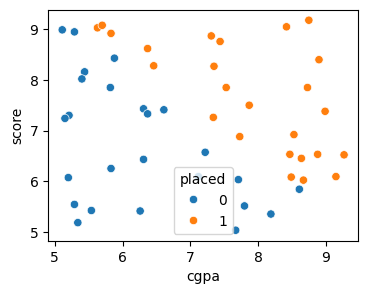

In [115]:
mlt.figure(figsize=(4,3))
sns.scatterplot(x="cgpa", y="score", data=df, hue="placed")
mlt.show()

In [116]:
x = df.iloc[:,:-1]
y = df["placed"]

In [117]:
y

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    1
42    1
43    1
44    1
45    1
46    1
47    1
48    1
49    1
Name: placed, dtype: int64

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [120]:
from sklearn.linear_model import Perceptron

In [121]:
pr = Perceptron()
pr.fit(x_train, y_train)

Perceptron()

In [122]:
pr.score(x_train,y_train)*100 

45.0

In [123]:
pr.score(x_test, y_test)*100

70.0

c:\Users\Anooj Dilip Archana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


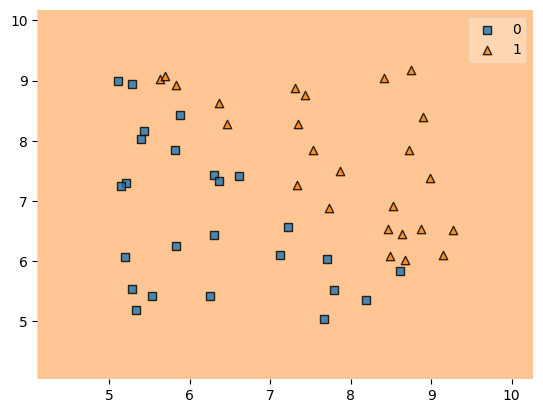

In [124]:
plot_decision_regions(x.to_numpy(), y.to_numpy(),clf=pr)
mlt.show()